In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('emails.csv')

In [3]:
df.head()

,text,spam,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,Subject: naturally irresistible your corporate...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subject: the stock trading gunslinger fanny i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subject: unbelievable new homes made easy im ...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subject: 4 color printing special request add...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Subject: do not have money , get software cds ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
eml = pd.concat([df['text'],df['spam']],axis=1)

In [5]:
eml.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
eml['spam'].value_counts()

0                                                                                               4359
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: spam, dtype: int64

In [7]:
g = eml[eml['spam']=='1'] 

In [8]:
y = eml[eml['spam']=='0'] 

In [9]:
email = pd.concat([g,y])

<AxesSubplot:xlabel='spam', ylabel='count'>

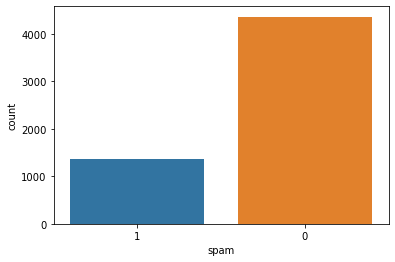

In [15]:
sns.countplot(data=email,x='spam')

<AxesSubplot:xlabel='spam', ylabel='text length'>

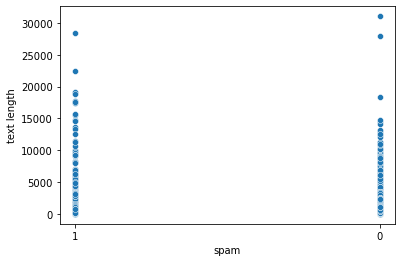

In [16]:
sns.scatterplot(data=email,x='spam',y='text length')

In [10]:
email['text'] = email['text'].apply(lambda x: x[9:])

In [11]:
email['text']

0       naturally irresistible your corporate identity...
1       the stock trading gunslinger  fanny is merrill...
2       unbelievable new homes made easy  im wanting t...
3       4 color printing special  request additional i...
4       do not have money , get software cds from here...
                              ...                        
5725    re : research and development charges to gpg  ...
5726    re : receipts from visit  jim ,  thanks again ...
5727    re : enron case study update  wow ! all on the...
5728    re : interest  david ,  please , call shirley ...
5729    news : aurora 5 . 2 update  aurora version 5 ....
Name: text, Length: 5726, dtype: object

In [12]:
email.head()

,text,spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1


In [20]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5726 entries, 0 to 5729
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         5726 non-null   object
 1   spam         5726 non-null   object
 2   text length  5726 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 178.9+ KB


In [21]:
email.groupby('spam').describe()

text length                                                         \
           count         mean          std   min    25%     50%     75%   
spam                                                                      
0         4359.0  1612.220922  1737.667321  13.0  576.0  1122.0  2036.0   
1         1367.0  1317.913680  2272.067352  18.0  402.0   694.0  1252.5   

               
          max  
spam           
0     31055.0  
1     28432.0

After running some tests with older versions, i decided this database spam emails are not tailored to my aim. So i created a database of spam emails and used concat to merge it with non spam emails from the previous database

In [18]:
dx = pd.read_csv('spam_text.csv',header=0)

In [32]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17 non-null     object
 1   spam    17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 400.0+ bytes


In [38]:
new_email = email[email['spam'] == '0'].head(20)

In [44]:
#This new database is much smaller, as i had to scrap manually for sales emails online. 
data = pd.concat([new_email,dx],axis=0,ignore_index=True)

In [69]:
type(dx['spam'][1])

numpy.int64

In [70]:
data['spam']= data['spam'].astype(str)

# Feature Engineering The Model

In [45]:
import string
from nltk.corpus import stopwords 

In [46]:
def text_process(mess):
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc= ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [47]:
data['text'].head(5).apply(text_process)

0    [look, sandy, dorm, week, sydney, bares, park,...
1    [hello, guys, bugging, completed, questionnair...
2    [sacramento, weather, station, fyi, forwarded,...
3    [enron, india, newsdesk, jan, 18, th, newsclip...
4    [powerisk, 2001, invitation, angelika, thanks,...
Name: text, dtype: object

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(data['text'])

In [72]:
email_bow = bow_transformer.transform(data['text'])

In [73]:
email_bow.shape

(37, 1872)

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

In [53]:
tf_transformer = TfidfTransformer().fit(email_bow)

In [74]:
email_tfidf = tf_transformer.transform(email_bow)

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
from sklearn.model_selection import train_test_split

In [75]:
X = email_tfidf
y= data['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=200)

In [58]:
from sklearn.pipeline import Pipeline 

In [76]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [77]:
pred = spam_detect_model.predict(X_test)


In [79]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test,pred))
print (confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12

[[6 0]
 [2 4]]


# Testing the Model 

In [80]:
test =['Hi there Bob, Im emailing you today to let you know we have created a new product called Knox.In this Knox you’ll learn how to create meaningful texts, and add pictures. Go to our website to see more information If you know anybody else who’ll find this useful please forward the email to them.Let us know if you face any problems accessing the Knox by replying to this email. We’ll get back to you ASAP and ensure you gain access to it immediately.Thank you,Chloe ']

In [90]:
type(test)

list

In [82]:
bow_test = bow_transformer.transform(test)

In [83]:
tfidf_test = tf_transformer.transform(bow_test)


In [84]:
spam_detect_model.predict(tfidf_test)

array(['1'], dtype='<U1')

In [86]:
test1 = ['Hi Eddie, I hope all is well.Did you have a chance to look at the report I sent you last week? We have the meeting today after lunch.Anyway, let me know if you have questions.Best,Todd']

In [89]:
type(test1)

list

In [87]:
bow_test1 = bow_transformer.transform(test1)

In [91]:
tfidf_test1 = tf_transformer.transform(bow_test1)

In [92]:
spam_detect_model.predict(tfidf_test1)

array(['0'], dtype='<U1')